In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [2]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/images'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/codes.txt'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/valid.txt'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/labels')]

In [3]:
path_lbl = path/'labels'
path_img = path/'images'

In [4]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/images/0016E5_08340.png'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/images/Seq05VD_f02190.png'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/images/Seq05VD_f00060.png')]

In [5]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/labels/0016E5_06990_P.png'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/labels/Seq05VD_f00210_P.png'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/labels/0006R0_f02460_P.png')]

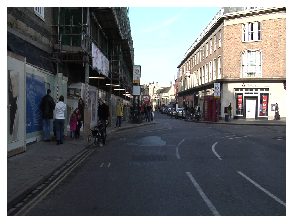

In [6]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [7]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

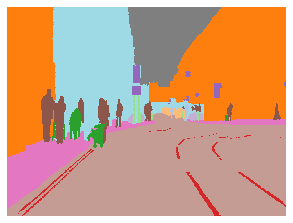

In [8]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [9]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[ 4,  4,  4,  ...,  4,  4,  4],
          [ 4,  4,  4,  ...,  4,  4,  4],
          [ 4,  4,  4,  ...,  4,  4,  4],
          ...,
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17]]]))

In [10]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [11]:
len(codes)

32

In [12]:
size = src_size//2
bs = 4

In [13]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [14]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
data

ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /home/dominykas/GitHub/Segmentation/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /home/dominykas/GitHub/Segmentation/data/camvid/images;

Test: None

In [15]:
# data.show_batch(2, figsize=(10,7))

In [16]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [17]:
metrics=acc_camvid
# metrics=accuracy

In [18]:
wd=1e-2

In [19]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)
learn.callbacks.append(ShowGraph(learn))

In [20]:
# lr_find(learn)
# learn.recorder.plot()

In [21]:
# lr=3e-3
# learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

In [22]:
# learn.save('stage-1')

In [23]:
# learn.unfreeze()

In [24]:
# lrs = slice(lr/400,lr/4)

In [25]:
# learn.fit_one_cycle(12, lrs, pct_start=0.8)

In [26]:
# learn.save('stage-2')

In [27]:
import cv2

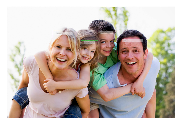

In [28]:
im = cv2.imread('test_data/newfam.jpg')
im = im[:,:,[2,1,0]]
image = Image(tensor(im).permute(2,0,1).float() / 255.)
image.show()

In [29]:
# seg, *_ = learn.predict(image)

In [30]:
# image.show(y=seg)

In [31]:
# seg

In [32]:
# learn.model

# Face Seg

In [33]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [34]:
# learn.load('stage-2')

In [35]:
from pathlib import PosixPath
path = PosixPath('data/FASSEG/')
path_img = path/'images'
path_lbl = path/'labels'

In [36]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('data/FASSEG/images/0016E5_08340.png'),
 PosixPath('data/FASSEG/images/Seq05VD_f02190.png'),
 PosixPath('data/FASSEG/images/Seq05VD_f00060.png')]

In [37]:
label_range = slice(0,227)

In [38]:
camvid_codes = ['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall']

In [73]:
camvid_codes.index('Sky'), camvid_codes.index('Pedestrian')

(21, 16)

In [74]:
# codes = ['eyes','hair','bg','mouth','nose','skin','contour']
codes = []
# 0-36: eyes
# 37: hair
# 76: bg
# 149: mouth
# 178: nose
# 225: face
# 38-75: contour
# 179-224: contour
# 77-148: contour
# 150-177: contour
# lbl_cats = [32,33,34,35,36,37,38,38,38,38,38]
lbl_cats = [16,16,21,16,16,16,16,16,16,16,16]
# lbl_cats = [0,1,2,3,4,5,6,6,6,6,6]
# lbl_cats = [0,1,2,3,3,3,4,4,4,4,4]

In [75]:
def put_if_in_range(i, min_i, max_i, int2class, class_idx):
    if min_i <= i and i <= max_i:
        int2class[i] = class_idx
        
lbl2class = {}
for i in range(label_range.start, label_range.stop):
    put_if_in_range(i, 0, 36, lbl2class, lbl_cats[0]) # eyes
    put_if_in_range(i, 37, 37, lbl2class, lbl_cats[1]) # hair
    put_if_in_range(i, 76, 76, lbl2class, lbl_cats[2]) # bg
    put_if_in_range(i, 149, 149, lbl2class, lbl_cats[3]) # mouth
    put_if_in_range(i, 178, 178, lbl2class, lbl_cats[4]) # nose
    put_if_in_range(i, 225, 225, lbl2class, lbl_cats[5]) # skin
    put_if_in_range(i, 38, 75, lbl2class, lbl_cats[6]) # contour
    put_if_in_range(i, 77, 148, lbl2class, lbl_cats[7]) # contour
    put_if_in_range(i, 150, 177, lbl2class, lbl_cats[8]) # contour
    put_if_in_range(i, 179, 224, lbl2class, lbl_cats[9]) # contour
    put_if_in_range(i, 226, 226, lbl2class, lbl_cats[10]) # contour

In [76]:
from tqdm.notebook import tqdm

def preprocess_masks(lbl_fnames, lbl_out_dir, label_range=label_range, lbl2class=lbl2class):
    for mpath in tqdm(lbl_fnames):
        m = open_mask(mpath).data
        res = m.clone()
        for i in range(label_range.start, label_range.stop):
            res[ m==i ] = lbl2class[i]
        seg = ImageSegment(res)
        seg.save(os.path.join(lbl_out_dir, f'{mpath.stem}_P{mpath.suffix}'))

In [77]:
preprocess_masks(get_image_files('data/FASSEG/V2/labels'), path_lbl)

In [78]:
codes = camvid_codes + codes
lbl_cats = list(range(0,32)) + lbl_cats

In [79]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('data/FASSEG/labels/0016E5_06990_P.png'),
 PosixPath('data/FASSEG/labels/Seq05VD_f00210_P.png'),
 PosixPath('data/FASSEG/labels/0006R0_f02460_P.png')]

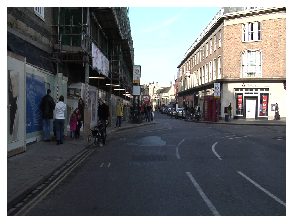

In [80]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [81]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

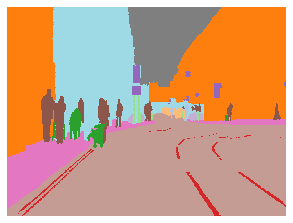

In [82]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [83]:
# for lb_path in lbl_names:
#     assert mask.data.min() == 0
#     assert mask.data.max() == len(codes)-1

In [146]:
src_size = np.array([720, 960])
size = src_size//4

bs = 4

src = (SegmentationItemList.from_folder(path_img)
#        .split_by_rand_pct(0.2)
       .split_none()
       .label_from_func(get_y_fn, classes=codes))

data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

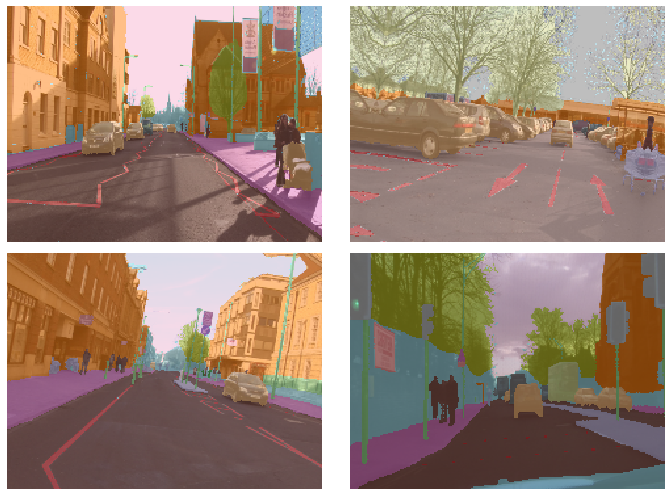

In [147]:
data.show_batch(2, figsize=(10,7))

In [148]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

metrics=acc_camvid

wd=1e-2

In [140]:
# learn.save('fasseg-start')

In [141]:
# learn.load('fasseg-start')

In [149]:
learn.data = data

In [150]:
learn.model.layers[-1]

Sequential(
  (0): Conv2d(99, 32, kernel_size=(1, 1), stride=(1, 1))
)

In [151]:
ni = 99
n_classes = len(codes)
len(codes)

32

In [101]:
learn.model.layers[-1] = conv_layer(ni, n_classes, ks=1, use_activ=False, norm_type=None).to('cuda')

In [102]:
learn.freeze_to(-1)

In [103]:
def get_pred(y_pred, mask):
    y_pred0 = y_pred[:,0].unsqueeze(1)[mask].view(-1,1)
    y_pred1 = y_pred[:,1].unsqueeze(1)[mask].view(-1,1)
    y_pred = torch.cat((y_pred0, y_pred1), dim=1)
    return y_pred

# loss = CrossEntropyFlat()
loss = nn.CrossEntropyLoss()
def Loss(y_pred, y_true):
    b = y_pred.size(0)
    mask = (y_true != 0)
    num_fg = len(mask[0][mask[0]==True])
    y_pred_fg = get_pred(y_pred, mask)
    y_true_fg = y_true[mask].view(-1)
    mask = (y_true == 0)
    num_bg = len(mask[0][mask[0]==True])
    y_pred_bg = get_pred(y_pred, mask)
    y_true_bg = y_true[mask].view(-1)
    p = torch.randperm(y_true.size(-1)*y_true.size(-2))[:num_bg]
    y_pred = torch.cat((y_pred_fg, y_pred_bg[:,p]), dim=0)
    y_true = torch.cat((y_true_fg, y_true_bg[:,p]), dim=0)
    return loss(y_pred, y_true)
#     return loss(y_pred[mask.expand_as(y_pred)], y_true[mask].view(b,1,-1))

In [104]:
# learn.loss_func = Loss

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


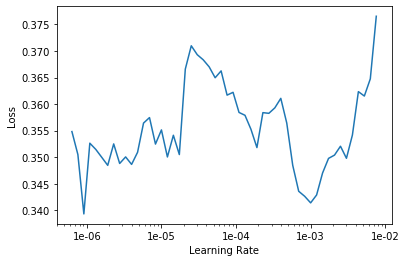

In [152]:
lr_find(learn)
learn.recorder.plot()

In [154]:
learn.fit_one_cycle(2, slice(1e-5), pct_start=0.8)

In [ ]:
learn.fit_one_cycle(10, slice(1e-5), pct_start=0.8)

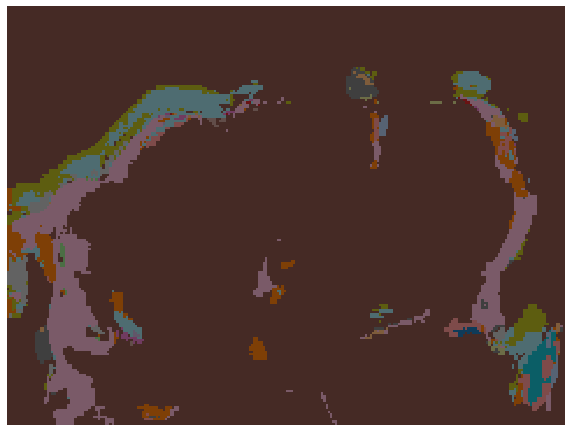

In [158]:
seg, *_ = learn.predict(image)
image.show(y=seg, figsize=(10,10))

In [106]:
learn.fit_one_cycle(10, slice(1e-3), pct_start=0.8)

In [157]:
# learn.show_results(rows=4, figsize=(8,9))

In [110]:
seg, *_ = learn.predict(image)

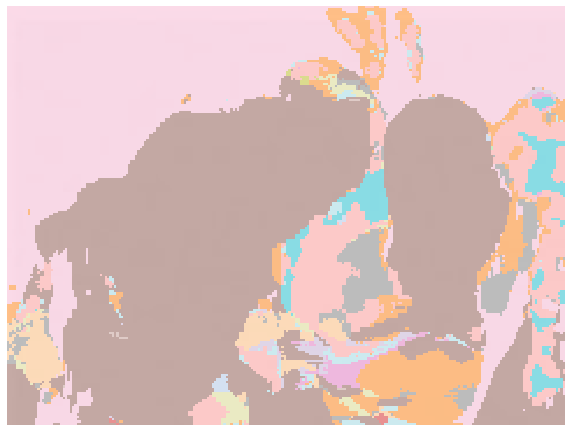

In [111]:
image.show(y=seg, figsize=(10,10))

In [119]:
unique,counts = seg.data.unique(return_counts=True)
_,i = counts.sort()
print(unique[i])
print(counts[i])

tensor([20,  8, 18, 26, 10, 31,  2, 15, 19, 30, 27, 17,  5, 29, 22,  4, 12, 21,
        16])
tensor([    1,     2,    19,    22,    23,    51,    57,   252,   256,   332,
          350,   691,   867,   979,  1358,  2736,  3718, 13060, 18426])


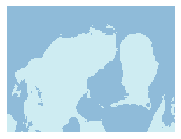

In [122]:
m = torch.zeros_like(seg.data)
m[seg.data == 16] = 1
face_seg = ImageSegment(m)
face_seg.show()

In [131]:
resize_one_img = lambda x, size: F.interpolate(x[None], size=size, mode='bilinear', align_corners=True)[0]
m_res = resize_one_img(m.float(), image.data.shape[1:])

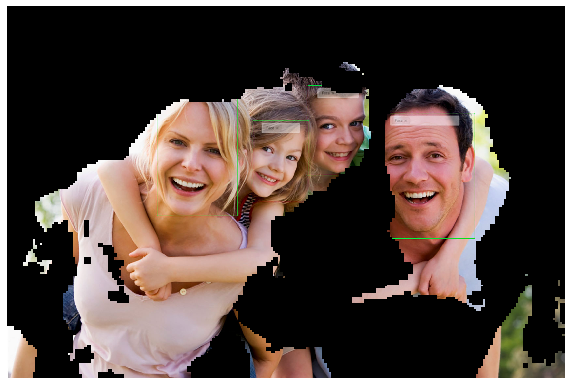

In [136]:
image.data[m_res.expand_as(image.data) != 1] = 0
image.show(figsize=(10,10))

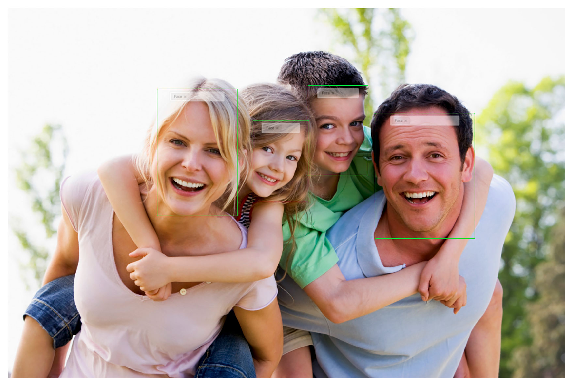

In [67]:
image.show(figsize=(10,10))

# COCO

In [ ]:
asd

In [68]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/images'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/codes.txt'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/valid.txt'),
 PosixPath('/home/dominykas/GitHub/Segmentation/data/camvid/labels')]

# Big

In [69]:
learn.destroy()

size = src_size

bs=2

this Learner object self-destroyed - it still exists, but no longer usable


In [70]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [71]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [72]:
learn.load('stage-2');

FileNotFoundError: [Errno 2] No such file or directory: 'data/FASSEG/images/models/stage-2.pth'

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
lr=1e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

In [ ]:
learn.unfreeze()

In [ ]:
lrs = slice(1e-6,lr/10)

In [ ]:

learn.fit_one_cycle(10, lrs)